In [34]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Get the data 
df_test = pd.read_csv("2019_test.csv")
df_train = pd.read_csv("2019_train.csv")
df_test = df_test.drop(columns=["Unnamed: 0"])
df_train = df_train.drop(columns=["Unnamed: 0"])
df_train.head()

,Player,Tm,Pos,Age,Fumbles,FantasyPoints,TDs,YDs,Touches
0,Cooper Kupp,LAR,WR,26,3,270.5,10,1165,97
1,Kareem Hunt,CLE,RB,24,1,101.4,3,464,80
2,C.J. Ham,MIN,RB,26,1,37.6,1,166,24
3,Trey Quinn,WAS,WR,24,1,49.8,1,198,26
4,Travis Homer,SEA,RB,21,0,28.0,0,170,29


In [37]:
# Set up the training models in a list 
x_train = df_train.drop(columns=["Player", "Tm", "Pos", "FantasyPoints"]).to_numpy()
x_test = df_test.drop(columns=["Player", "Tm", "Pos", "FantasyPoints"]).to_numpy()

y_train = df_train["FantasyPoints"].to_numpy()
y_test = df_test["FantasyPoints"].to_numpy()

In [38]:
regr = linear_model.LinearRegression()
model = regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

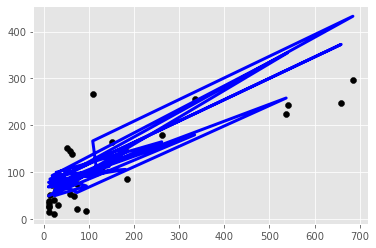

In [39]:
plt.scatter(x_test[:,-1:], y_test,  color='black')
plt.plot(x_test[:,-1:], y_pred, color='blue', linewidth=3)
plt.show()

In [40]:
print (x_test)
print (y_pred)

[[  24    2    5  607   58]
 [  25    1    1  459   34]
 [  25   12   34 5359  685]
 [  27    0    8 1189  108]
 [  23    1    2  515  118]
 [  28    0    4  311   36]
 [  23    0    0   92   10]
 [  24    3    8 1772  334]
 [  35    0    1  123   10]
 [  26    3    7 1332  184]
 [  26    1    0  187   30]
 [  25    0    7  594  129]
 [  25    0    2  350   58]
 [  27    2    1  169   23]
 [  30    2    0  570   94]
 [  23    0    0  359   26]
 [  23    0    3  198   13]
 [  34    2    4  374   73]
 [  23   13   21 3615  537]
 [  25    0    1  100   10]
 [  37    1    4  529   63]
 [  25    0    4  329   25]
 [  22    4    4  969  180]
 [  23    0    1  169   10]
 [  24    0    1  200   12]
 [  25   10   24 4678  659]
 [  23    1    4  269   24]
 [  23    0    5  234   18]
 [  28    7   23 4136  540]
 [  27    0    0   66   22]
 [  31    1    6  692   50]
 [  23    1    4  453   73]
 [  26    0    3  679  144]
 [  27    2   10  952  151]
 [  25    2    2  303   46]
 [  22    0    2  29